# <font color = lightcoral> Extending Agents 3 with Timeseries Data
>    
##### <font color = red> Testing High Precision Model --> 20240712_Transformers_Non_Overlapping_run_143_of_180.pt

**20240715_flask_app_model_change_v1.00.py**

> From transformer models
>

# <font color = red> Template Creation

## <font color = grey> Admin

In [3]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 5 Key Files

In [2]:
# import pandas as pd
# import numpy as np
# import time

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'

# # ################################## Part 1: Parsed Raw File ###################################

# # print("\n" + "*"*100)
# # print("********************** Part 1: Parsed Raw File ******************************************")
# # print("*"*100 + "\n")

# # parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
# # parsed_file_df = pd.read_csv(parsed_file)
# # display(parsed_file_df.head())
# # print("Shape of Parsed Raw File:", parsed_file_df.shape)

# ######################### Part 2: Encoded File with Feature for Model Training ######################

# print("\n" + "*"*100)
# print("********************** Part 2: Input Data with Features ******************************************")
# print("*"*100 + "\n")

# encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
# display(encoded_feature_input_file_df.iloc[:, :25].head())
# print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ######################

# print("\n" + "*"*100)
# print("********************** Part 3:  Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ******************************************")
# print("*"*100 + "\n")

# import pandas as pd

# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# # Load the latest file
# latest_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
# latest_df = pd.read_parquet(latest_file)

# # Display the head of the final dataframe
# display(latest_df.head())
# display(latest_df.tail())

# print("Shape of File:", latest_df.shape)

# # ######################### Part 4: Encoded File where Train_Test = Test HEAD ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 4: Test Set - HEAD *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].head(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 5: Encoded File where Train_Test = Test MIDDLE ###############################

# # # Part 4: Encoded File where Train_Test = Test (Records 100-200)
# # print("\n" + "*"*100)
# # print("********************** Part 5: Test Set - Records 100-200 *******************************")
# # print("*"*100 + "\n")


# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[100:110, :25])
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)

# # ######################### Part 6: Encoded File where Train_Test = Test TAIL ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 6: Test Set - TAIL *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].tail(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 7: Event_ID to Template Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 7: Event_ID to Template Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
# # eventid_template_df = pd.read_csv(eventid_template_file)
# # display(eventid_template_df.head())
# # print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# # ######################### Part 8: Event_ID to Encoding Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 8: Event_ID to Encoding Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
# # eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# # display(eventid_encoding_df.head())
# # print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# ######################### Part 9: Event_ID to Template Mapping #######################################

# print("\n" + "*"*100)
# print("********************** Part 9: Event_ID to Template Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# display(eventid_encoding_df.head())
# print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# # ######################### Part 10: First Two Records from X_test and y_test #######################

# # print("\n" + "*"*100)
# # print("********************** Part 10: First Two Records from X_test and y_test *****************************")
# # print("*"*100 + "\n")

# # file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # # Load the test data
# # X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# # y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # # Convert the first two records to DataFrames for better display
# # X_test_first_two = pd.DataFrame(X_test[:2].reshape(-1, X_test.shape[2]))
# # y_test_first_two = pd.DataFrame(y_test[:2], columns=['Actual'])

# # # Display the first two records
# # print("First two records from X_test:")
# # display(X_test_first_two)

# # print("\nFirst two records from y_test:")
# # display(y_test_first_two)

___
# <font color = red> Agent 3 Inference: TERTIARY --> DONE
## Map EventID integers to Template Text and add 2 new columns for tacking

### <font color = grey> This agent will then work with Agents 1 & 2 as needed

### <font color = blue>CURRENT

In [3]:
# import requests
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# from datetime import datetime
# import re
# import torch

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/03.Local_Inference_Eval_Files'
# file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # Model parameters
# max_events = 5  # Set your actual max_events
# input_length = 30  # Set your actual input_length
# gap = 2  # Set your actual gap
# prediction_period = 1  # Set your actual prediction_period

# # Other parameters
# start_time = '2005-11-08 18:50:00'  # seq 11624
# num_tests = 130

# # Define the number of records for each test run (input_length + gap + prediction_period)
# num_records_per_test = input_length + gap + prediction_period

# # Load the test data
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")

# # Load the original parquet file with sequence mapping
# input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# original_df = pd.read_parquet(input_file)

# # Ensure Seq_Num is integer for proper merging
# original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# # Filter the test dataset based on the specified start time
# filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
# if filtered_df.empty:
#     start_date = pd.to_datetime(start_time).date()
#     same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
#     if not same_date_df.empty:
#         available_times = same_date_df['time_start'].unique().tolist()
#         print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
#     all_times_df = original_df[original_df['Train_Test'] == 'Test']
#     all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
#     nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
#     print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
#     exit()

# start_seq_num = int(filtered_df['Seq_Num'].values[0])
# max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
# expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# if expected_end_seq_num > max_end_seq_num:
#     max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
#     print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
#     num_tests = max_allowed_runs
#     expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# # Calculate the correct start and end sequence numbers for X_test and y_test
# start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
# end_index_x_test = min(start_index_x_test + num_tests, len(X_test))

# # Use the prepare_data_for_model function to process the test data
# def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
#     start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
#     end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
#     X_test_limited = X_test[start_index_x_test:end_index_x_test]
#     X_test_limited = X_test_limited[:, :, 1:max_events + 16]  # Adjust to max_events + 15 other features + 1
#     X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
#     return X_test_tensor, start_index_x_test, end_index_x_test

# X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events)

# print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")

# # Prepare the data for the request
# data = {
#     'X_test': X_test_tensor.tolist(),
#     'input_length': input_length,
#     'gap': gap,
#     'prediction_period': prediction_period,
#     'max_events': max_events
# }

# # Send a request to the server
# response = requests.post('http://0.0.0.0:5000/predict', json=data)

# # Print the raw response text for debugging
# print("Raw response text:", response.text)

# # Attempt to parse the response as JSON
# try:
#     response_data = response.json()
# except ValueError as e:
#     print("Failed to parse JSON response:", e)
#     response_data = {}

# # Verify the response keys
# print("Response keys:", response_data.keys())

# # Process the response if it's valid
# if 'predictions' in response_data:
#     predictions = np.array(response_data['predictions']).flatten()

#     # Print first 10 predictions and actual labels
#     print("First 10 predictions:", predictions[:10])
#     print("First 10 actual labels:", y_test[start_index_x_test:end_index_x_test][:10])

#     # Create DataFrame for tracking and merging with additional information
#     tracking_data = []

#     for i in range(num_tests):
#         total_seq_start = start_seq_num + i * num_records_per_test
#         total_seq_end = total_seq_start + num_records_per_test - 1
#         source_seq_start = total_seq_start
#         source_seq_end = source_seq_start + input_length - 1
#         gap_seq_start = source_seq_end + 1
#         gap_seq_end = gap_seq_start + gap - 1
#         prediction_seq_start = total_seq_end - prediction_period + 1
#         prediction_seq_end = total_seq_end
        
#         tracking_data.append([
#             total_seq_start, total_seq_end, source_seq_start, source_seq_end,
#             gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
#             predictions[i], y_test[start_index_x_test + i],
#             str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
#         ])

#     tracking_df = pd.DataFrame(tracking_data, columns=[
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "time_start"
#     ])

#     # Display the first 30 columns of the new DataFrame
#     pd.set_option('display.max_columns', 50)
#     print("\nEnhanced Results:")
#     print(tracking_df.head())

#     # Define the timestamp
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/03B.{timestamp}_agent1_non_overlap_model2_consl.csv"
#     tracking_df.to_csv(final_file, index=False)

#     print(f"Final file with consolidated columns saved to: {final_file}")

#     # Calculate metrics
#     conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
#     precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
#     f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

#     # Check if the confusion matrix has the expected shape
#     if conf_matrix.size == 4:
#         tn, fp, fn, tp = conf_matrix.ravel()
#     else:
#         tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#         fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#         fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#         tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

#     # Create a DataFrame for metrics
#     metrics_df = pd.DataFrame({
#         'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#         'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
#     })

#     # Print metrics DataFrame
#     print("\nMetrics:")
#     print(metrics_df)

#     # Plot the confusion matrix
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#                 xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()

#     # Additional text mapping functionality
#     # Convert Source_Seq_Start to integer for proper merging
#     tracking_df['Source_Seq_Start'] = tracking_df['Source_Seq_Start'].astype(int)

#     # Load the master tracking file
#     master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
#     master_tracking_df = pd.read_parquet(master_tracking_file)

#     # Check the columns of master_tracking_df before merging
#     print("Columns in master_tracking_df:", master_tracking_df.columns)

#     # Ensure 'time_start' column exists in master_tracking_df
#     if 'time_start' not in master_tracking_df.columns:
#         print("Warning: 'time_start' column not found in master_tracking_df. Please check the master tracking file.")
#         master_tracking_df['time_start'] = pd.NaT  # Fill with NaT (Not a Time) if missing

#     # Merge with original data to get necessary columns
#     merged_df = tracking_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

#     # Print the columns of the merged dataframe to verify the merge
#     print("Columns in merged_df after merge:", merged_df.columns)

#     # Retain only necessary columns
#     columns_to_keep = [
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "Seq_Num", "Train_Test", "time_start_y", "time_start_int",
#         "Class", "unique_events", "most_frequent_event", "transitions", "entropy",
#         "hour_of_day", "day_of_week", "event_count", "top_event_frequency",
#         "prev_event_count", "transition_rate", "high_transition_rate", "prev_entropy",
#         "entropy_change", "rolling_event_count", "rolling_unique_event_count"
#     ]

#     # Check if all columns to keep are in the merged dataframe
#     missing_columns = [col for col in columns_to_keep if col not in merged_df.columns]
#     if missing_columns:
#         print(f"Warning: The following columns are missing from merged_df: {missing_columns}")

#     # Adjust for renamed columns
#     columns_to_keep = [col if col != 'time_start' else 'time_start_y' for col in columns_to_keep]

#     filtered_df = merged_df[columns_to_keep]

#     # Load event ID to template mapping file
#     eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
#     eventid_encoding_df = pd.read_csv(eventid_encoding_file)

#     # Create a dictionary for quick lookup
#     eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

#     # Function to consolidate events and map to templates
#     def clean_text(text):
#         # Remove unnecessary characters like <*>, <, and >
#         text = re.sub(r'<\*?>', '', text)
#         text = text.replace('<', '').replace('>', '')
#         return text

#     def consolidate_events_to_text(df, start_col, end_col, col_name):
#         consolidated = []
#         for i, row in df.iterrows():
#             seen_events = set()
#             events = []
#             for seq_num in range(row[start_col], row[end_col] + 1):
#                 event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
#                 for event in event_list:
#                     for e in event.split(', '):
#                         if e not in seen_events:
#                             seen_events.add(e)
#                             if int(e) in eventid_to_template:
#                                 cleaned_text = clean_text(eventid_to_template[int(e)])
#                                 events.append(f'"{cleaned_text}"')
#                             else:
#                                 events.append('"Unknown"')
#             consolidated.append(', '.join(events))
#         return consolidated

#     # Add the new columns
#     filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')
#     filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')

#     # Display the head and tail of the final dataframe
#     display(filtered_df.head())
#     display(filtered_df.tail())

#     # Define the timestamp
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/03B.{timestamp}_agent3_non_overlap_model2_consl.csv"
#     filtered_df.to_csv(final_file, index=False)

#     print(f"Final file with consolidated columns saved to: {final_file}")

# else:
#     print("No predictions found in the response.")

### <font color = blue> Reconciliation of Numbers after Merging the DFs

In [4]:
# import pandas as pd
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate metrics
# conf_matrix = confusion_matrix(filtered_df['Actual'], filtered_df['Predicted'], labels=[0, 1])
# precision = precision_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)
# recall = recall_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)
# accuracy = accuracy_score(filtered_df['Actual'], filtered_df['Predicted'])
# f1 = f1_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)

# # Check if the confusion matrix has the expected shape
# if conf_matrix.size == 4:
#     tn, fp, fn, tp = conf_matrix.ravel()
# else:
#     # Handle cases with fewer than two classes in the confusion matrix
#     tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#     fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#     fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#     tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

# # Create a DataFrame for metrics
# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#     'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
# })

# # Print metrics DataFrame
# print("\nMetrics:")
# print(metrics_df)

# # Plot the confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

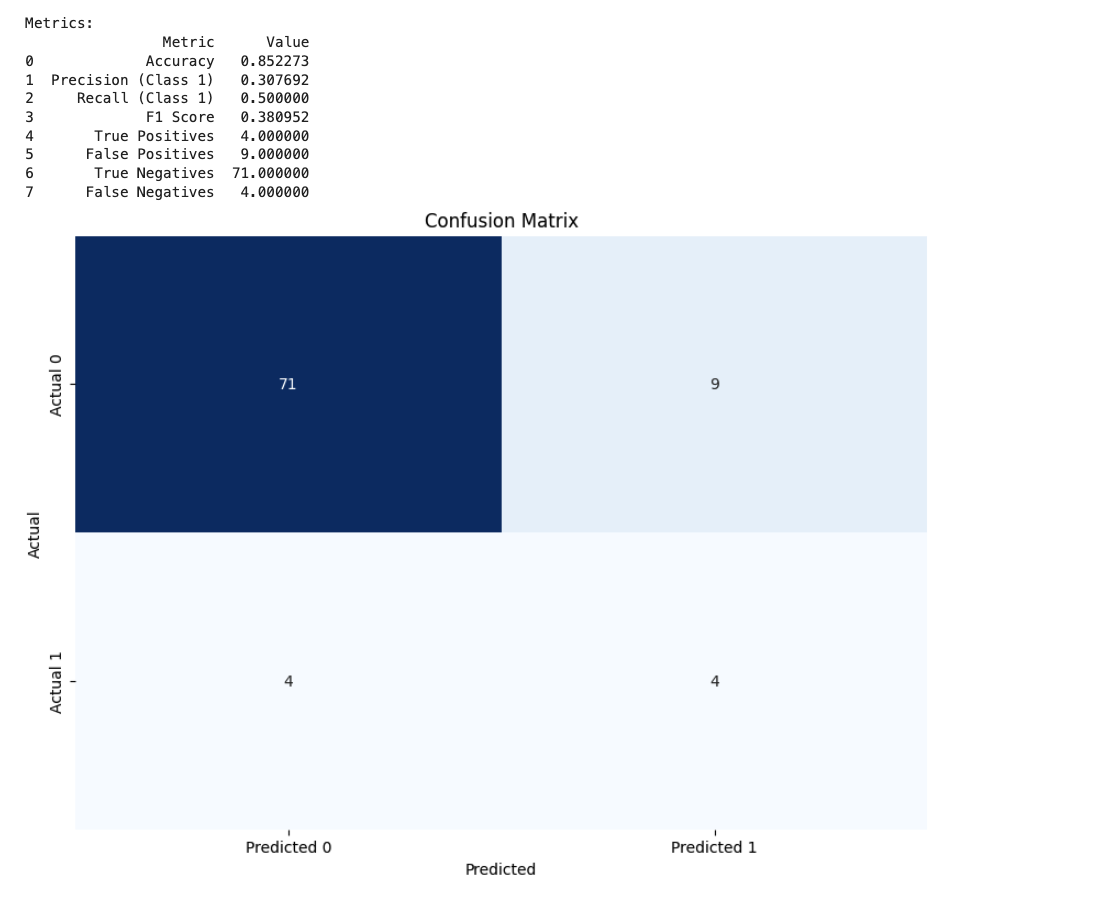

---

# <font color = red> Template Prep
## <font color = blue> Generate Scenarios
### <font color = green> Dry Run - Sample for Validation

---

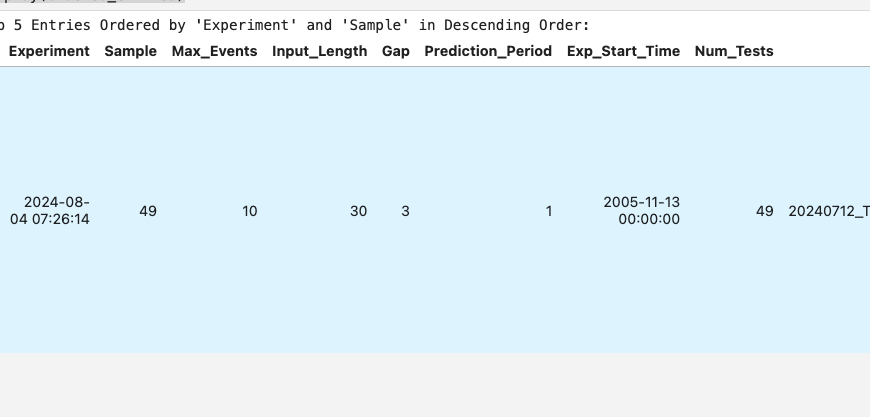

In [1]:
# import requests
# import numpy as np
# import pandas as pd
# import torch
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# from datetime import datetime
# import re
# import os

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates'
# file_prefix = "06.20240714_062624_non_overlap_full_test"

# # Model parameters
# # max_events = 5
# # input_length = 30
# # gap = 2
# # prediction_period = 1
# # # Other parameters
# # start_time = '2005-11-08 18:50:00'
# # num_tests = 130

# max_events = 20
# input_length = 20
# gap = 5
# prediction_period = 1
# start_time = '2005-11-21 00:00:00'
# num_tests = 49

# # max_events = [5, 10, 20, 30, 40]
# # input_length = [20, 30]
# # gap = [1, 2, 3, 4, 5]
# # prediction_period = 1
# # start_time = Any date between 2005-11-08 and 2006-01-04
# # num_tests = Any number from 10 to 130

# # Define the number of records for each test run (input_length + gap + prediction_period)
# num_records_per_test = input_length + gap + prediction_period

# # Load the test data
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # # print("\n" + "*"*100)
# # # print("********************** Part 1: Parsed Raw File ******************************************")
# # # print("*"*100 + "\n")

# print("\n" + "*"*100)
# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")
# print("\n" + "*"*100)

# # Load the original parquet file with sequence mapping
# input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# original_df = pd.read_parquet(input_file)

# # Ensure Seq_Num is integer for proper merging
# original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# # Filter the test dataset based on the specified start time
# filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
# if filtered_df.empty:
#     start_date = pd.to_datetime(start_time).date()
#     same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
#     if not same_date_df.empty:
#         available_times = same_date_df['time_start'].unique().tolist()
#         print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
#     all_times_df = original_df[original_df['Train_Test'] == 'Test']
#     all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
#     nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
#     print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
#     exit()

# start_seq_num = int(filtered_df['Seq_Num'].values[0])
# max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
# expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# if expected_end_seq_num > max_end_seq_num:
#     max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
#     print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
#     num_tests = max_allowed_runs
#     expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# # Calculate the correct start and end sequence numbers for X_test and y_test
# start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
# end_index_x_test = min(start_index_x_test + num_tests, len(X_test))

# # Use the prepare_data_for_model function to process the test data
# def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
#     start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
#     end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
#     X_test_limited = X_test[start_index_x_test:end_index_x_test]
#     X_test_limited = X_test_limited[:, :, 1:max_events + 16]
#     X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
#     return X_test_tensor, start_index_x_test, end_index_x_test

# X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events)

# print("\n" + "*"*100)
# print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")
# print("\n" + "*"*100)

# # Prepare the data for the request
# data = {
#     'X_test': X_test_tensor.tolist(),
#     'input_length': input_length,
#     'gap': gap,
#     'prediction_period': prediction_period,
#     'max_events': max_events
# }

# # Send a request to the server
# response = requests.post('http://0.0.0.0:5000/predict', json=data)

# # Print the raw response text for debugging
# print("Raw response text:", response.text)

# # Attempt to parse the response as JSON
# try:
#     response_data = response.json()
# except ValueError as e:
#     print("Failed to parse JSON response:", e)
#     response_data = {}

# print("\n" + "*"*100)
# # Verify the response keys
# print("Response keys:", response_data.keys())
# # print("\n" + "*"*100)

# # Process the response if it's valid
# if 'predictions' in response_data:
#     predictions = np.array(response_data['predictions']).flatten()
#     model_name = response_data.get('model_name', 'unknown_model')

#     # Print first 10 predictions and actual labels
#     print("\n" + "*"*100)
#     print("First 10 predictions:", predictions[:10])
#     print("\n" + "*"*100)
#     print("First 10 actual labels:", y_test[start_index_x_test:end_index_x_test][:10])
#     # print("\n" + "*"*100)

#     # Create DataFrame for tracking and merging with additional information
#     tracking_data = []

#     for i in range(num_tests):
#         total_seq_start = start_seq_num + i * num_records_per_test
#         total_seq_end = total_seq_start + num_records_per_test - 1
#         source_seq_start = total_seq_start
#         source_seq_end = source_seq_start + input_length - 1
#         gap_seq_start = source_seq_end + 1
#         gap_seq_end = gap_seq_start + gap - 1
#         prediction_seq_start = total_seq_end - prediction_period + 1
#         prediction_seq_end = total_seq_end
        
#         tracking_data.append([
#             total_seq_start, total_seq_end, source_seq_start, source_seq_end,
#             gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
#             predictions[i], y_test[start_index_x_test + i],
#             str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
#         ])

#     tracking_df = pd.DataFrame(tracking_data, columns=[
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "time_start"
#     ])

#     # Calculate metrics
#     conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
#     precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
#     f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

#     # Check if the confusion matrix has the expected shape
#     if conf_matrix.size == 4:
#         tn, fp, fn, tp = conf_matrix.ravel()
#     else:
#         tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#         fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#         fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#         tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

#     # Create a DataFrame for metrics
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
#     metrics_data = {
#         'Experiment': [timestamp] * num_tests,  # Using timestamp as the experiment number
#         'Sample': list(range(1, num_tests + 1)),
#         'Max_Events': [max_events] * num_tests,
#         'Input_Length': [input_length] * num_tests,
#         'Gap': [gap] * num_tests,
#         'Prediction_Period': [prediction_period] * num_tests,
#         'Exp_Start_Time': [start_time] * num_tests,
#         'Num_Tests': [num_tests] * num_tests,
#         'Model_Name': [model_name] * num_tests,
#         'Precision': [precision] * num_tests,
#         'Recall': [recall] * num_tests,
#         'Accuracy': [accuracy] * num_tests,
#         'F1_Score': [f1] * num_tests,
#         'TN': [tn] * num_tests,
#         'FP': [fp] * num_tests,
#         'FN': [fn] * num_tests,
#         'TP': [tp] * num_tests
#     }
#     metrics_df = pd.DataFrame(metrics_data)

#     # Combine tracking_df and metrics_df
#     combined_df = pd.concat([metrics_df, tracking_df], axis=1)

#     # Load the master tracking file
#     master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
#     master_tracking_df = pd.read_parquet(master_tracking_file)

#     # Merge with original data to get necessary columns
#     merged_df = combined_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

#     # Rename the 'time_start_y' column to 'Sample_Start_Time'
#     merged_df.rename(columns={'time_start_y': 'Sample_Start_Time'}, inplace=True)


#     # Retain only necessary columns
#     columns_to_keep = [
#         "Experiment", "Sample", "Max_Events", "Input_Length", "Gap", "Prediction_Period",
#         "Exp_Start_Time", "Num_Tests", "Model_Name", "Precision", "Recall", "Accuracy", "F1_Score", "TN", "FP", "FN", "TP",
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End", "Gap_Seq_Start",
#         "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End", "Predicted", "Actual", "Sample_Start_Time",
#         "Class", "unique_events", "most_frequent_event", "transitions", "entropy", "hour_of_day", "day_of_week",
#         "event_count", "top_event_frequency", "prev_event_count", "transition_rate", "high_transition_rate",
#         "prev_entropy", "entropy_change", "rolling_event_count", "rolling_unique_event_count"
#     ]

#     # Check if all columns to keep are in the merged dataframe
#     missing_columns = [col for col in columns_to_keep if col not in merged_df.columns]
#     if missing_columns:
#         print(f"Warning: The following columns are missing from merged_df: {missing_columns}")

#     # Adjust for renamed columns
#     columns_to_keep = [col if col != 'time_start' else 'Sample_Start_Time' for col in columns_to_keep]

#     filtered_df = merged_df[columns_to_keep]

#     # Load event ID to template mapping file
#     eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
#     eventid_encoding_df = pd.read_csv(eventid_encoding_file)

#     # Create a dictionary for quick lookup
#     eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

#     # Function to consolidate events and map to templates
#     def clean_text(text):
#         # Remove unnecessary characters like <*>, <, and >
#         text = re.sub(r'<\*?>', '', text)
#         text = text.replace('<', '').replace('>', '')
#         return text

#     def consolidate_events_to_text(df, start_col, end_col, col_name):
#         consolidated = []
#         for i, row in df.iterrows():
#             seen_events = set()
#             events = []
#             for seq_num in range(row[start_col], row[end_col] + 1):
#                 if col_name in master_tracking_df.columns:
#                     event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
#                     for event in event_list:
#                         for e in event.split(', '):
#                             if e not in seen_events:
#                                 seen_events.add(e)
#                                 if int(e) in eventid_to_template:
#                                     cleaned_text = clean_text(eventid_to_template[int(e)])
#                                     events.append(f'"{cleaned_text}"')
#                                 else:
#                                     events.append('"Unknown"')
#             consolidated.append(', '.join(events))
#         return consolidated

#     # Add the new columns
#     filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')
#     filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')

#     # Display the head and tail of the final dataframe

#     # # print("\n" + "*"*100)
#     # print("********************** Final Dataframe (Head) ******************************************")
#     # display(filtered_df.head(2))
    
#     # # print("\n" + "*"*100)
#     # print("********************** Final Dataframe (Tail) ******************************************")
#     # display(filtered_df.tail(2))
#     # # print("\n" + "*"*100)

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/A-Template_Detail.parquet"

#     # Ensure 'Experiment' column is of integer type
#     filtered_df['Experiment'] = filtered_df['Experiment'].astype(int)
    
#     if os.path.exists(final_file):
#         existing_df = pd.read_parquet(final_file)
#         combined_final_df = pd.concat([existing_df, filtered_df])
#         combined_final_df.to_parquet(final_file, index=False)
#     else:
#         filtered_df.to_parquet(final_file, index=False)
    
#     # print("\n" + "*"*100)
#     print(f"Final file with consolidated columns saved to: {final_file}")
#     # print("\n" + "*"*100)

#     # Load and display the contents of the saved parquet file
#     saved_results = pd.read_parquet(final_file)
#     # print("\n" + "*"*100)
#     print("********************** Displaying the last 5 rows from  the saved parquet file (Tail)  ******************************************")
#     display(saved_results.tail(5))
#     print("\n" + "*"*100)

# else:
#     print("No predictions found in the response.")

# <font color = green>Generate some credible samples that can be used for templates

In [2]:
import requests
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime
import re
import os
import random

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates'
file_prefix = "06.20240714_062624_non_overlap_full_test"

# Define the number of records for each test run (input_length + gap + prediction_period)
num_records_per_test = lambda input_length, gap, prediction_period: input_length + gap + prediction_period

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Function to prepare data for the model
def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
    start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
    end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
    X_test_limited = X_test[start_index_x_test:end_index_x_test]
    X_test_limited = X_test_limited[:, :, 1:max_events + 16]
    X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
    return X_test_tensor, start_index_x_test, end_index_x_test

# Function to clean text
def clean_text(text):
    text = re.sub(r'<\*?>', '', text)
    text = text.replace('<', '').replace('>', '')
    return text

# Function to consolidate events and map to templates
def consolidate_events_to_text(df, start_col, end_col, col_name, master_tracking_df, eventid_to_template):
    consolidated = []
    for i, row in df.iterrows():
        seen_events = set()
        events = []
        for seq_num in range(row[start_col], row[end_col] + 1):
            if col_name in master_tracking_df.columns:
                event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
                for event in event_list:
                    for e in event.split(', '):
                        if e not in seen_events:
                            seen_events.add(e)
                            if int(e) in eventid_to_template:
                                cleaned_text = clean_text(eventid_to_template[int(e)])
                                events.append(f'"{cleaned_text}"')
                            else:
                                events.append('"Unknown"')
        consolidated.append(', '.join(events))
    return consolidated

# Main function to run the experiment
def run_experiment(max_events, input_length, gap, prediction_period, start_time, num_tests):
    filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
    if filtered_df.empty:
        start_date = pd.to_datetime(start_time).date()
        same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
        if not same_date_df.empty:
            available_times = same_date_df['time_start'].unique().tolist()
            print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
        all_times_df = original_df[original_df['Train_Test'] == 'Test']
        all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
        nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
        print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
        start_time = nearest_time  # Update the start_time to the nearest available time
        filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]

    start_seq_num = int(filtered_df['Seq_Num'].values[0])
    max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
    expected_end_seq_num = start_seq_num + num_tests * num_records_per_test(input_length, gap, prediction_period) - 1

    if expected_end_seq_num > max_end_seq_num:
        max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test(input_length, gap, prediction_period)
        print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
        num_tests = max_allowed_runs
        expected_end_seq_num = start_seq_num + num_tests * num_records_per_test(input_length, gap, prediction_period) - 1

    X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test(input_length, gap, prediction_period), num_tests, original_df, max_events)

    print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")

    data = {
        'X_test': X_test_tensor.tolist(),
        'input_length': input_length,
        'gap': gap,
        'prediction_period': prediction_period,
        'max_events': max_events
    }

    response = requests.post('http://0.0.0.0:5000/predict', json=data)

    print("Raw response text:", response.text)

    try:
        response_data = response.json()
    except ValueError as e:
        print("Failed to parse JSON response:", e)
        response_data = {}

    if 'predictions' in response_data:
        predictions = np.array(response_data['predictions']).flatten()
        model_name = response_data.get('model_name', 'unknown_model')

        num_predictions = len(predictions)
        num_tests = min(num_tests, num_predictions)  # Adjust num_tests to the number of predictions returned

        tracking_data = []

        for i in range(num_tests):
            total_seq_start = start_seq_num + i * num_records_per_test(input_length, gap, prediction_period)
            total_seq_end = total_seq_start + num_records_per_test(input_length, gap, prediction_period) - 1
            source_seq_start = total_seq_start
            source_seq_end = source_seq_start + input_length - 1
            gap_seq_start = source_seq_end + 1
            gap_seq_end = gap_seq_start + gap - 1
            prediction_seq_start = total_seq_end - prediction_period + 1
            prediction_seq_end = total_seq_end
            
            tracking_data.append([
                total_seq_start, total_seq_end, source_seq_start, source_seq_end,
                gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
                predictions[i], y_test[start_index_x_test + i],
                str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
            ])

        tracking_df = pd.DataFrame(tracking_data, columns=[
            "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
            "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
            "Predicted", "Actual", "time_start"
        ])

        conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
        precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
        recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
        accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
        f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

        if conf_matrix.size == 4:
            tn, fp, fn, tp = conf_matrix.ravel()
        else:
            tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
            fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
            fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
            tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

        timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
        metrics_data = {
            'Experiment': [timestamp] * num_tests,
            'Sample': list(range(1, num_tests + 1)),
            'Max_Events': [max_events] * num_tests,
            'Input_Length': [input_length] * num_tests,
            'Gap': [gap] * num_tests,
            'Prediction_Period': [prediction_period] * num_tests,
            'Exp_Start_Time': [start_time] * num_tests,
            'Num_Tests': [num_tests] * num_tests,
            'Model_Name': [model_name] * num_tests,
            'Precision': [precision] * num_tests,
            'Recall': [recall] * num_tests,
            'Accuracy': [accuracy] * num_tests,
            'F1_Score': [f1] * num_tests,
            'TN': [tn] * num_tests,
            'FP': [fp] * num_tests,
            'FN': [fn] * num_tests,
            'TP': [tp] * num_tests
        }
        metrics_df = pd.DataFrame(metrics_data)

        combined_df = pd.concat([metrics_df, tracking_df], axis=1)

        master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
        master_tracking_df = pd.read_parquet(master_tracking_file)

        merged_df = combined_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

        merged_df.rename(columns={'time_start_y': 'Sample_Start_Time'}, inplace=True)

        columns_to_keep = [
            "Experiment", "Sample", "Max_Events", "Input_Length", "Gap", "Prediction_Period",
            "Exp_Start_Time", "Num_Tests", "Model_Name", "Precision", "Recall", "Accuracy", "F1_Score", "TN", "FP", "FN", "TP",
            "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End", "Gap_Seq_Start",
            "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End", "Predicted", "Actual", "Sample_Start_Time",
            "Class", "unique_events", "most_frequent_event", "transitions", "entropy", "hour_of_day", "day_of_week",
            "event_count", "top_event_frequency", "prev_event_count", "transition_rate", "high_transition_rate",
            "prev_entropy", "entropy_change", "rolling_event_count", "rolling_unique_event_count"
        ]

        missing_columns = [col for col in columns_to_keep if col not in merged_df.columns]
        if missing_columns:
            print(f"Warning: The following columns are missing from merged_df: {missing_columns}")

        columns_to_keep = [col if col != 'time_start' else 'Sample_Start_Time' for col in columns_to_keep]

        filtered_df = merged_df[columns_to_keep]

        eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
        eventid_encoding_df = pd.read_csv(eventid_encoding_file)

        eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

        filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)
        filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)

        final_file = f"{save_dir}/A-Template_Detail.parquet"

        filtered_df['Experiment'] = filtered_df['Experiment'].astype(int)
        filtered_df['Exp_Start_Time'] = filtered_df['Exp_Start_Time'].astype(str)  # Convert Exp_Start_Time to string
        
        if os.path.exists(final_file):
            existing_df = pd.read_parquet(final_file)
            combined_final_df = pd.concat([existing_df, filtered_df])
            combined_final_df.to_parquet(final_file, index=False)
        else:
            filtered_df.to_parquet(final_file, index=False)
        
        print(f"Final file with consolidated columns saved to: {final_file}")

        saved_results = pd.read_parquet(final_file)
        print("********************** Displaying the last 5 rows from the saved parquet file (Tail)  ******************************************")
        display(saved_results.tail(5))

    else:
        print("No predictions found in the response.")

# Define parameter ranges
max_events_list = [5, 10, 20, 30, 40]
input_length_list = [20, 30]
gap_list = [1, 2, 3, 4, 5]
prediction_period_list = [1]
start_times_list = pd.date_range(start='2005-11-08', end='2006-01-04').strftime('%Y-%m-%d %H:%M:%S').tolist()
num_tests_list = list(range(10, 131))

# Generate 5 random parameter combinations
random_combinations = random.sample([
    (max_events, input_length, gap, prediction_period, start_time, num_tests)
    for max_events in max_events_list
    for input_length in input_length_list
    for gap in gap_list
    for prediction_period in prediction_period_list
    for start_time in start_times_list
    for num_tests in num_tests_list
], 5)

# Run the experiments
for combination in random_combinations:
    max_events, input_length, gap, prediction_period, start_time, num_tests = combination
    print(f"Running experiment with parameters: max_events={max_events}, input_length={input_length}, gap={gap}, prediction_period={prediction_period}, start_time={start_time}, num_tests={num_tests}")
    run_experiment(max_events, input_length, gap, prediction_period, start_time, num_tests)

Running experiment with parameters: max_events=40, input_length=20, gap=1, prediction_period=1, start_time=2005-12-24 00:00:00, num_tests=108
Error: start_time 2005-12-24 00:00:00 not found in the dataset. Available times on 2005-12-24 are: [Timestamp('2005-12-24 00:55:00'), Timestamp('2005-12-24 02:10:00'), Timestamp('2005-12-24 02:55:00'), Timestamp('2005-12-24 04:20:00'), Timestamp('2005-12-24 04:25:00'), Timestamp('2005-12-24 04:45:00'), Timestamp('2005-12-24 04:55:00'), Timestamp('2005-12-24 05:10:00'), Timestamp('2005-12-24 05:15:00'), Timestamp('2005-12-24 05:20:00'), Timestamp('2005-12-24 05:25:00'), Timestamp('2005-12-24 05:35:00'), Timestamp('2005-12-24 05:40:00'), Timestamp('2005-12-24 05:50:00'), Timestamp('2005-12-24 06:00:00'), Timestamp('2005-12-24 06:05:00'), Timestamp('2005-12-24 06:10:00'), Timestamp('2005-12-24 06:15:00'), Timestamp('2005-12-24 06:30:00'), Timestamp('2005-12-24 06:40:00'), Timestamp('2005-12-24 06:55:00'), Timestamp('2005-12-24 07:00:00'), Timestamp(

/tmp/ipykernel_136561/921811553.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])


Error: start_time 2005-12-24 00:00:00 not found in the dataset. The nearest available time is: 2005-12-24T00:55:00.000000000
Number of test runs exceeds the maximum allowed (21). Setting num_tests to 21.
X_test shape after adjusting columns: torch.Size([16, 20, 55])
Raw response text: {"model_name":"20240712_Transformers_Non_Overlapping_run_131_of_180.pt","predictions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}



/tmp/ipykernel_136561/921811553.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)
/tmp/ipykernel_136561/921811553.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_even

Final file with consolidated columns saved to: /home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet
********************** Displaying the last 5 rows from the saved parquet file (Tail)  ******************************************


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,...,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2075,20240804083246,12,40,20,1,1,2005-12-24 00:55:00,16,20240712_Transformers_Non_Overlapping_run_131_...,0.0,...,35433,2.0,0.000000,0,0.000000,0.000000,8.0,10.0,"""instruction cache parity error corrected""","""instruction cache parity error corrected"""
2076,20240804083246,13,40,20,1,1,2005-12-24 00:55:00,16,20240712_Transformers_Non_Overlapping_run_131_...,0.0,...,35433,104.0,0.000000,0,0.000000,0.000000,698.0,10.0,"""instruction cache parity error corrected"", "" ...","""instruction cache parity error corrected"", "" ..."
2077,20240804083246,14,40,20,1,1,2005-12-24 00:55:00,16,20240712_Transformers_Non_Overlapping_run_131_...,0.0,...,35423,60.0,0.728814,1,1.385891,0.254064,137.0,23.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."
2078,20240804083246,15,40,20,1,1,2005-12-24 00:55:00,16,20240712_Transformers_Non_Overlapping_run_131_...,0.0,...,35433,2.0,0.500000,0,0.693147,0.000000,106.0,21.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."
2079,20240804083246,16,40,20,1,1,2005-12-24 00:55:00,16,20240712_Transformers_Non_Overlapping_run_131_...,0.0,...,35433,3.0,0.000000,0,0.000000,0.000000,117.0,16.0,"""data cache parity error detected. attempting...","""data cache parity error detected. attempting..."


Running experiment with parameters: max_events=20, input_length=20, gap=2, prediction_period=1, start_time=2005-12-25 00:00:00, num_tests=15
Error: start_time 2005-12-25 00:00:00 not found in the dataset. Available times on 2005-12-25 are: [Timestamp('2005-12-25 00:45:00'), Timestamp('2005-12-25 05:25:00'), Timestamp('2005-12-25 11:05:00'), Timestamp('2005-12-25 11:10:00'), Timestamp('2005-12-25 11:20:00'), Timestamp('2005-12-25 11:50:00'), Timestamp('2005-12-25 12:00:00'), Timestamp('2005-12-25 12:35:00'), Timestamp('2005-12-25 14:45:00'), Timestamp('2005-12-25 14:50:00'), Timestamp('2005-12-25 16:20:00'), Timestamp('2005-12-25 17:40:00'), Timestamp('2005-12-25 18:55:00'), Timestamp('2005-12-25 20:25:00'), Timestamp('2005-12-25 22:05:00'), Timestamp('2005-12-25 22:10:00'), Timestamp('2005-12-25 22:45:00')]


/tmp/ipykernel_136561/921811553.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])


Error: start_time 2005-12-25 00:00:00 not found in the dataset. The nearest available time is: 2005-12-25T00:45:00.000000000
X_test shape after adjusting columns: torch.Size([15, 20, 35])
Raw response text: {"model_name":"20240712_Transformers_Non_Overlapping_run_73_of_180.pt","predictions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}

Final file with consolidated columns saved to: /home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet
********************** Displaying the last 5 rows from the saved parquet file (Tail)  ******************************************


/tmp/ipykernel_136561/921811553.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)
/tmp/ipykernel_136561/921811553.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_even

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,...,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2090,20240804083248,11,20,20,2,1,2005-12-25 00:45:00,15,20240712_Transformers_Non_Overlapping_run_73_o...,0.0,...,35427,64.0,0.731707,1,0.139061,1.476794,557.0,18.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."
2091,20240804083248,12,20,20,2,1,2005-12-25 00:45:00,15,20240712_Transformers_Non_Overlapping_run_73_o...,0.0,...,35433,2.0,0.750000,1,0.693147,0.000000,325.0,75.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."
2092,20240804083248,13,20,20,2,1,2005-12-25 00:45:00,15,20240712_Transformers_Non_Overlapping_run_73_o...,0.0,...,35433,124.0,0.000000,0,1.663975,-1.663975,145.0,19.0,"""data cache parity error detected. attempting...","""data cache parity error detected. attempting..."
2093,20240804083248,14,20,20,2,1,2005-12-25 00:45:00,15,20240712_Transformers_Non_Overlapping_run_73_o...,0.0,...,35431,2.0,0.478261,0,0.000000,1.609691,618.0,23.0,""" torus receiver input pipe error(s) (dcr ) d...",""" torus receiver input pipe error(s) (dcr ) d..."
2094,20240804083248,15,20,20,2,1,2005-12-25 00:45:00,15,20240712_Transformers_Non_Overlapping_run_73_o...,0.0,...,35429,104.0,0.487179,0,1.409030,0.173788,244.0,29.0,""" torus receiver input pipe error(s) (dcr ) d...",""" torus receiver input pipe error(s) (dcr ) d..."


Running experiment with parameters: max_events=30, input_length=20, gap=5, prediction_period=1, start_time=2005-12-28 00:00:00, num_tests=28
Error: start_time 2005-12-28 00:00:00 not found in the dataset. Available times on 2005-12-28 are: [Timestamp('2005-12-28 01:55:00'), Timestamp('2005-12-28 02:00:00'), Timestamp('2005-12-28 04:05:00'), Timestamp('2005-12-28 05:35:00'), Timestamp('2005-12-28 06:25:00'), Timestamp('2005-12-28 07:10:00'), Timestamp('2005-12-28 07:20:00'), Timestamp('2005-12-28 08:10:00'), Timestamp('2005-12-28 09:20:00'), Timestamp('2005-12-28 09:35:00'), Timestamp('2005-12-28 09:40:00'), Timestamp('2005-12-28 09:50:00'), Timestamp('2005-12-28 10:00:00'), Timestamp('2005-12-28 10:20:00'), Timestamp('2005-12-28 10:25:00'), Timestamp('2005-12-28 10:45:00'), Timestamp('2005-12-28 11:00:00'), Timestamp('2005-12-28 11:20:00'), Timestamp('2005-12-28 11:30:00'), Timestamp('2005-12-28 11:50:00'), Timestamp('2005-12-28 11:55:00'), Timestamp('2005-12-28 12:00:00'), Timestamp('

/tmp/ipykernel_136561/921811553.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])


Error: start_time 2005-12-28 00:00:00 not found in the dataset. The nearest available time is: 2005-12-28T01:55:00.000000000
Number of test runs exceeds the maximum allowed (6). Setting num_tests to 6.
X_test shape after adjusting columns: torch.Size([6, 20, 45])
Raw response text: {"model_name":"20240712_Transformers_Non_Overlapping_run_109_of_180.pt","predictions":[0,0,0,0,0,1]}

Final file with consolidated columns saved to: /home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet
********************** Displaying the last 5 rows from the saved parquet file (Tail)  ******************************************


/tmp/ipykernel_136561/921811553.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)
/tmp/ipykernel_136561/921811553.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_even

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,...,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2096,20240804083249,2,30,20,5,1,2005-12-28 01:55:00,6,20240712_Transformers_Non_Overlapping_run_109_...,0.0,...,35433,5.0,0.714286,1,1.332179,0.019605,84.0,24.0,""" torus receiver input pipe error(s) (dcr ) d...",""" torus receiver input pipe error(s) (dcr ) d..."
2097,20240804083249,3,30,20,5,1,2005-12-28 01:55:00,6,20240712_Transformers_Non_Overlapping_run_109_...,0.0,...,35418,1.0,0.136054,0,0.000000,0.587853,599.0,22.0,"""ciod: Error reading message prefix on CioStre...","""ciod: Error reading message prefix on CioStre..."
2098,20240804083249,4,30,20,5,1,2005-12-28 01:55:00,6,20240712_Transformers_Non_Overlapping_run_109_...,0.0,...,35429,104.0,0.487179,0,1.409030,0.173788,244.0,29.0,""" torus receiver input pipe error(s) (dcr ) d...",""" torus receiver input pipe error(s) (dcr ) d..."
2099,20240804083249,5,30,20,5,1,2005-12-28 01:55:00,6,20240712_Transformers_Non_Overlapping_run_109_...,0.0,...,35433,268.0,0.007692,0,0.238469,-0.158982,529.0,28.0,"""ciod: generated core files for program "", ""i...","""ciod: generated core files for program "", ""i..."
2100,20240804083249,6,30,20,5,1,2005-12-28 01:55:00,6,20240712_Transformers_Non_Overlapping_run_109_...,0.0,...,35433,14.0,0.857143,1,0.693147,0.560895,156.0,25.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."


Running experiment with parameters: max_events=30, input_length=30, gap=3, prediction_period=1, start_time=2005-12-20 00:00:00, num_tests=22
Error: start_time 2005-12-20 00:00:00 not found in the dataset. Available times on 2005-12-20 are: [Timestamp('2005-12-20 01:30:00'), Timestamp('2005-12-20 04:55:00'), Timestamp('2005-12-20 07:25:00'), Timestamp('2005-12-20 07:40:00'), Timestamp('2005-12-20 07:55:00'), Timestamp('2005-12-20 08:05:00'), Timestamp('2005-12-20 08:10:00'), Timestamp('2005-12-20 08:15:00'), Timestamp('2005-12-20 09:00:00'), Timestamp('2005-12-20 09:05:00'), Timestamp('2005-12-20 09:10:00'), Timestamp('2005-12-20 09:15:00'), Timestamp('2005-12-20 09:20:00'), Timestamp('2005-12-20 09:30:00'), Timestamp('2005-12-20 09:40:00'), Timestamp('2005-12-20 10:05:00'), Timestamp('2005-12-20 11:25:00'), Timestamp('2005-12-20 11:40:00'), Timestamp('2005-12-20 11:55:00'), Timestamp('2005-12-20 12:00:00'), Timestamp('2005-12-20 12:05:00'), Timestamp('2005-12-20 12:15:00'), Timestamp('

/tmp/ipykernel_136561/921811553.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])


Error: start_time 2005-12-20 00:00:00 not found in the dataset. The nearest available time is: 2005-12-20T01:30:00.000000000
Number of test runs exceeds the maximum allowed (18). Setting num_tests to 18.
X_test shape after adjusting columns: torch.Size([18, 20, 45])
Raw response text: {"model_name":"20240712_Transformers_Non_Overlapping_run_115_of_180.pt","predictions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}



/tmp/ipykernel_136561/921811553.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)


Final file with consolidated columns saved to: /home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet
********************** Displaying the last 5 rows from the saved parquet file (Tail)  ******************************************


/tmp/ipykernel_136561/921811553.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)
/tmp/ipykernel_136561/921811553.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Experiment'] = filtered_df['Experiment'].astype(int)
/tmp/ipykernel_136561/921811553.py:220: SettingWithCopyWarning: 
A value is tryin

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,...,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2114,20240804083251,14,30,30,3,1,2005-12-20 01:30:00,18,20240712_Transformers_Non_Overlapping_run_115_...,0.0,...,35433,148.0,0.000000,0,0.000000,0.000000,670.0,10.0,"""instruction cache parity error corrected"", "" ...","""instruction cache parity error corrected"", "" ..."
2115,20240804083251,15,30,30,3,1,2005-12-20 01:30:00,18,20240712_Transformers_Non_Overlapping_run_115_...,0.0,...,35433,2.0,0.500000,0,0.693147,0.000000,106.0,21.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."
2116,20240804083251,16,30,30,3,1,2005-12-20 01:30:00,18,20240712_Transformers_Non_Overlapping_run_115_...,0.0,...,35433,3.0,0.000000,0,1.098612,-1.098612,145.0,23.0,"""data cache parity error detected. attempting...","""data cache parity error detected. attempting..."
2117,20240804083251,17,30,30,3,1,2005-12-20 01:30:00,18,20240712_Transformers_Non_Overlapping_run_115_...,0.0,...,35431,32.0,0.891892,1,0.000000,1.237048,127.0,24.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."
2118,20240804083251,18,30,30,3,1,2005-12-20 01:30:00,18,20240712_Transformers_Non_Overlapping_run_115_...,0.0,...,35433,1.0,0.928571,1,0.000000,1.291417,19.0,13.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."


Running experiment with parameters: max_events=30, input_length=30, gap=3, prediction_period=1, start_time=2005-11-19 00:00:00, num_tests=97
Error: start_time 2005-11-19 00:00:00 not found in the dataset. Available times on 2005-11-19 are: [Timestamp('2005-11-19 02:20:00'), Timestamp('2005-11-19 02:40:00'), Timestamp('2005-11-19 03:10:00'), Timestamp('2005-11-19 03:55:00'), Timestamp('2005-11-19 04:20:00'), Timestamp('2005-11-19 06:00:00'), Timestamp('2005-11-19 06:05:00'), Timestamp('2005-11-19 06:20:00'), Timestamp('2005-11-19 06:40:00'), Timestamp('2005-11-19 07:25:00'), Timestamp('2005-11-19 08:00:00'), Timestamp('2005-11-19 08:05:00'), Timestamp('2005-11-19 08:10:00'), Timestamp('2005-11-19 09:55:00'), Timestamp('2005-11-19 11:00:00'), Timestamp('2005-11-19 11:50:00'), Timestamp('2005-11-19 12:00:00'), Timestamp('2005-11-19 12:15:00'), Timestamp('2005-11-19 12:30:00'), Timestamp('2005-11-19 13:10:00'), Timestamp('2005-11-19 13:35:00'), Timestamp('2005-11-19 13:45:00'), Timestamp('

/tmp/ipykernel_136561/921811553.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])


Error: start_time 2005-11-19 00:00:00 not found in the dataset. The nearest available time is: 2005-11-18T23:00:00.000000000
Number of test runs exceeds the maximum allowed (69). Setting num_tests to 69.
X_test shape after adjusting columns: torch.Size([69, 20, 45])
Raw response text: {"model_name":"20240712_Transformers_Non_Overlapping_run_115_of_180.pt","predictions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}



/tmp/ipykernel_136561/921811553.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)


Final file with consolidated columns saved to: /home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet
********************** Displaying the last 5 rows from the saved parquet file (Tail)  ******************************************


/tmp/ipykernel_136561/921811553.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)
/tmp/ipykernel_136561/921811553.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Experiment'] = filtered_df['Experiment'].astype(int)
/tmp/ipykernel_136561/921811553.py:220: SettingWithCopyWarning: 
A value is tryin

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,...,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2183,20240804083253,65,30,30,3,1,2005-11-18 23:00:00,69,20240712_Transformers_Non_Overlapping_run_115_...,1.0,...,35433,4.0,0.500000,0,0.000000,0.693147,74.0,21.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."
2184,20240804083253,66,30,30,3,1,2005-11-18 23:00:00,69,20240712_Transformers_Non_Overlapping_run_115_...,1.0,...,35433,1.0,0.000000,0,0.000000,0.000000,143.0,17.0,"""instruction cache parity error corrected"", ""j...","""instruction cache parity error corrected"", ""j..."
2185,20240804083253,67,30,30,3,1,2005-11-18 23:00:00,69,20240712_Transformers_Non_Overlapping_run_115_...,1.0,...,35433,2.0,0.000000,0,0.693147,-0.693147,106.0,16.0,"""instruction cache parity error corrected"", "" ...","""instruction cache parity error corrected"", "" ..."
2186,20240804083253,68,30,30,3,1,2005-11-18 23:00:00,69,20240712_Transformers_Non_Overlapping_run_115_...,1.0,...,35433,112.0,0.777778,1,1.560124,-0.249340,148.0,25.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."
2187,20240804083253,69,30,30,3,1,2005-11-18 23:00:00,69,20240712_Transformers_Non_Overlapping_run_115_...,1.0,...,35433,14.0,0.875000,1,1.004242,-0.020969,77.0,21.0,""" ddr error(s) detected and corrected on rank ...",""" ddr error(s) detected and corrected on rank ..."


---
## Queries on the combination runs

In [4]:
import pandas as pd

# Load the consolidated DataFrame from the parquet file
final_file = f"{save_dir}/A-Template_Detail.parquet"
consolidated_df = pd.read_parquet(final_file)

# Display the entire dataframe (for debugging purpose)
# print(consolidated_df)

# Query the entries ordered by 'Experiment' and 'Sample' columns in descending order
def get_ordered_entries(df, n=5):
    # Convert 'Experiment' column to datetime
    df['Experiment'] = pd.to_datetime(df['Experiment'], format='%Y%m%d%H%M%S')
    # Sort the DataFrame by 'Experiment' and 'Sample' in descending order
    df_sorted = df.sort_values(by=['Experiment', 'Sample'], ascending=[False, False])
    # Get the top n entries
    ordered_entries = df_sorted.head(n)
    return ordered_entries

# Get the top 5 entries ordered by 'Experiment' and 'Sample'
ordered_entries = get_ordered_entries(consolidated_df, n=5)
print("Top 5 Entries Ordered by 'Experiment' and 'Sample' in Descending Order:")
display(ordered_entries)

Top 5 Entries Ordered by 'Experiment' and 'Sample' in Descending Order:


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2187,2024-08-04 08:32:53,69,30,30,3,1,2005-11-18 23:00:00,69,20240712_Transformers_Non_Overlapping_run_115_of_180.pt,1.0,0.125,0.898551,0.222222,61,0,7,1,14496,14529,14496,14525,14526,14528,14529,14529,0,0.0,2006-01-03 11:25:00,0,3,193,14,0.983274,11,1,16,35433,14.0,0.875000,1,1.004242,-0.020969,77.0,21.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error reading message prefix on CioStream socket to :, "", ""Lustre mount FAILED : bglio : block_id : location"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", ""critical input interrupt (unit= bit=): warning for wire, suppressing further interrupts of same type"", ""instruction cache parity error corrected""",""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error reading message prefix on CioStream socket to :, "", ""Lustre mount FAILED : bglio : block_id : location"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", ""critical input interrupt (unit= bit=): warning for wire, suppressing further interrupts of same type"", ""instruction cache parity error corrected"""
2186,2024-08-04 08:32:53,68,30,30,3,1,2005-11-18 23:00:00,69,20240712_Transformers_Non_Overlapping_run_115_of_180.pt,1.0,0.125,0.898551,0.222222,61,0,7,1,14462,14495,14462,14491,14492,14494,14495,14495,0,1.0,2006-01-02 17:00:00,0,4,193,7,1.310784,17,0,9,35433,112.0,0.777778,1,1.560124,-0.249340,148.0,25.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", "" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""r= r= r= r="", ""ciod: Error reading message prefix on CioStream socket to :, """,""" ddr error(s) detected and corrected on rank , symbol over seconds"", "" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""r= r= r= r="", ""ciod: Error reading message prefix on CioStream socket to :, """
2185,2024-08-04 08:32:53,67,30,30,3,1,2005-11-18 23:00:00,69,20240712_Transformers_Non_Overlapping_run_115_of_180.pt,1.0,0.125,0.898551,0.222222,61,0,7,1,14428,14461,14428,14457,14458,14460,14461,14461,0,0.0,2005-12-31 11:35:00,0,1,228,0,0.000000,11,5,1,35433,2.0,0.000000,0,0.693147,-0.693147,106.0,16.0,"""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""ciod

In [ ]:
import pandas as pd

# Load the consolidated DataFrame from the parquet file
final_file = f"{save_dir}/A-Template_Detail.parquet"
consolidated_df = pd.read_parquet(final_file)

# Convert 'Experiment' column to datetime
consolidated_df['Experiment'] = pd.to_datetime(consolidated_df['Experiment'], format='%Y%m%d%H%M%S')

# Count the number of distinct experiments
num_distinct_experiments = consolidated_df['Experiment'].nunique()

print(f"Number of distinct experiments in the full file: {num_distinct_experiments}")

In [ ]:
import pandas as pd

# Load the consolidated DataFrame from the parquet file
final_file = f"{save_dir}/A-Template_Detail.parquet"
consolidated_df = pd.read_parquet(final_file)

# Convert 'Experiment' column to datetime (if necessary)
consolidated_df['Experiment'] = pd.to_datetime(consolidated_df['Experiment'], format='%Y%m%d%H%M%S')

# Count the number of distinct model names
num_distinct_models = consolidated_df['Model_Name'].nunique()

print(f"Number of distinct model names in the full file: {num_distinct_models}")

---

# Validate the parquet file

In [ ]:
# import pandas as pd

# # Path to the Parquet file
# file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet'

# # Load the Parquet file
# df = pd.read_parquet(file_path)

# # Display the contents of the Parquet file
# display(df.tail())

---
# <font color = red> Check Historical Weather Data

## <font color = orange> Read Converted Historical Data for BG/L Location (Livermore)

In [ ]:
# import pandas as pd

# # Path to the Parquet file
# parquet_file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/04.Local_Other_Files/20240803_Historical_Weather_94550/openweathermap_livermore.parquet'

# # Load the Parquet file
# df_weather_parquet = pd.read_parquet(parquet_file_path)

# # Display the head of the DataFrame
# display(df_weather_parquet.head())

---
# <font color = green> Plot Temperate and TP/FP

---

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Load the Parquet file for weather data
# parquet_file_path_weather = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/04.Local_Other_Files/20240803_Historical_Weather_94550/openweathermap_livermore.parquet'
# df_weather_parquet = pd.read_parquet(parquet_file_path_weather)

# # Load the Parquet file for experiment data
# file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet'
# df_experiment = pd.read_parquet(file_path)

# # Filter for the specific experiment
# experiment_id = 20240804040011
# df_experiment_filtered = df_experiment[df_experiment['Experiment'] == experiment_id].copy()

# # Focus on the relevant columns
# df_experiment_filtered = df_experiment_filtered[['Sample_Start_Time', 'Sample', 'Predicted', 'Actual']]

# # Convert Sample_Start_Time to datetime
# df_experiment_filtered['Sample_Start_Time'] = pd.to_datetime(df_experiment_filtered['Sample_Start_Time'])

# # Ensure 'Predicted' and 'Actual' columns are integers
# df_experiment_filtered['Predicted'] = df_experiment_filtered['Predicted'].astype(int)
# df_experiment_filtered['Actual'] = df_experiment_filtered['Actual'].astype(int)

# # Create a new column for categorizing TP and FP
# df_experiment_filtered['Category'] = 'Other'
# df_experiment_filtered.loc[(df_experiment_filtered['Predicted'] == 1) & (df_experiment_filtered['Actual'] == 1), 'Category'] = 'True Positive'
# df_experiment_filtered.loc[(df_experiment_filtered['Predicted'] == 1) & (df_experiment_filtered['Actual'] == 0), 'Category'] = 'False Positive'

# # Round Sample_Start_Time to the nearest hour
# df_experiment_filtered['Sample_Start_Time_Hour'] = df_experiment_filtered['Sample_Start_Time'].dt.round('h')

# # Ensure weather data is in the same timezone
# df_weather_parquet['gn_dt_pacific'] = pd.to_datetime(df_weather_parquet['gn_dt_pacific'], errors='coerce').dt.tz_localize(None).dt.round('h')

# # Print head of both DataFrames before merging
# # print("Experiment DataFrame head:")
# # # print(df_experiment_filtered.head())
# # # print("\nWeather DataFrame head:")
# # print(df_weather_parquet.head())

# # Merge the weather and experiment data on the date
# df_merged = pd.merge(df_weather_parquet, df_experiment_filtered, left_on='gn_dt_pacific', right_on='Sample_Start_Time_Hour', how='inner')

# # Check if the merged DataFrame is empty
# # print("\nMerged DataFrame head:")
# # print(df_merged.head())

# # Plotting
# if not df_merged.empty:
#     plt.figure(figsize=(14, 7))

#     # Line plot for temperature with thicker lines
#     plt.plot(df_merged['gn_dt_pacific'], df_merged['gn_temp_max'], label='Max Temperature (°F)', color='lightblue', linestyle='-', marker='', linewidth=3.5, zorder=1)

#     # Scatter plot for True Positives and False Positives
#     categories = ['True Positive', 'False Positive']
#     colors = {'True Positive': 'green', 'False Positive': 'tomato'}
#     sizes = {'True Positive': 150, 'False Positive': 150}  # Larger sizes for more visibility
#     opacities = {'True Positive': 1.0, 'False Positive': 1.0}  # Fully opaque

#     for category in categories:
#         subset = df_merged[df_merged['Category'] == category]
#         plt.scatter(subset['gn_dt_pacific'], subset['gn_temp_max'], label=category, color=colors[category], s=sizes[category], alpha=opacities[category], zorder=2)  # s for size, alpha for opacity

#     # Adding titles and labels
#     plt.title('Max Temperature Over Time with True and False Positives for Experiment 20240804040011')
#     plt.xlabel('Date')
#     plt.ylabel('Max Temperature (°F)')
#     plt.legend()

#     # Setting xticks for each day
#     plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#     plt.xticks(rotation=45, ha='right')

#     # Light and almost invisible grid lines
#     plt.grid(True, which='both', color='lightgrey', linestyle='-', linewidth=0.5)

#     plt.tight_layout()

#     # Show plot
#     plt.show()
# else:
#     print("Merged DataFrame is empty. No data to plot.")
